In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
data=pd.read_csv("wine.csv")

In [77]:
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [78]:
x=data.iloc[:,1:15]
y=data.iloc[:,0]

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Method-1

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
top10=SelectKBest(score_func=chi2,k=10)

In [81]:
score=top10.fit(x,y)

In [82]:
data1=pd.DataFrame(x.columns)
data2=pd.DataFrame(score.scores_)

In [83]:
best_features=pd.concat([data1,data2],axis=1)
best_features.columns=["Features","scores"]

In [84]:
best_features.nlargest(6,"scores")

,Features,scores
12,Proline,16540.067145
9,Color.int,109.016647
6,Flavanoids,63.334308
4,Mg,45.026381
3,Acl,29.383695
1,Malic.acid,28.068605


# Method-2

In [85]:
from sklearn.ensemble import ExtraTreesClassifier   
etc=ExtraTreesClassifier()
etc.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [86]:
best_features=etc.feature_importances_

In [87]:
data1=pd.DataFrame(x.columns)
data2=pd.DataFrame(best_features)

In [88]:
new_data=pd.concat([data1,data2],axis=1)
new_data.columns=["Features","scores"]
new_data.nlargest(8,"scores")

,Features,scores
12,Proline,0.154351
9,Color.int,0.134611
0,Alcohol,0.131704
6,Flavanoids,0.131188
11,OD,0.113854
10,Hue,0.066392
5,Phenols,0.059702
1,Malic.acid,0.040392


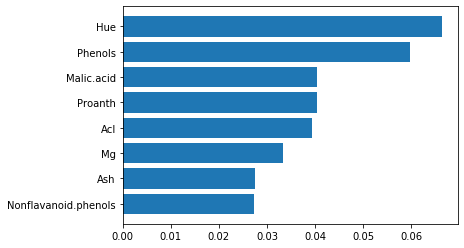

In [89]:
new_data=new_data.nsmallest(8,"scores")
plt.barh(new_data["Features"],new_data["scores"])
plt.show()

# Method-3

In [90]:
import statsmodels.api as sm

In [99]:
x=np.append(arr=np.ones((178,1)).astype("int"),values=x,axis=1)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,1.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,1.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,1.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [92]:
best_features=x[:,[0,1,2,3,4,6,7,8,10,12]]
ols=sm.OLS(endog=y,exog=best_features).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wine   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.24e-68
Time:                        14:35:13   Log-Likelihood:                -27.633
No. Observations:                 178   AIC:                             75.27
Df Residuals:                     168   BIC:                             107.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3917      0.508     10.624      0.000       4.390       6.394
x1            -0.2266      0.039     -5.871      0.000      -0.303      -0.150
x2             0.0630      0.023      2.773      0.006       0.018       0.108
x3            -0.3842      0.106     -3.619      0.000      -0.594      -0.175
x4             0.0624      0.009      6.842      0.000       0.044       0.080
x5             0.1260      0.072      1.745      0.083      -0.017       0.268
x6            -0.3971      0.054     -7.335      0.000      -0.504      -0.290
x7            -0.2171      0.222     -0.977      0.330      -0.656       0.222
x8             0.0720      0.014      5.053      0.000       0.044       0.100
x9            -0.2797      0.059     -4.723      0.000      -0.397      -0.163
==============================================================================
Omnibus:                        1.254   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.311
Skew:                           0.196   Prob(JB):                        0.519
Kurtosis:                       2.848   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
x=data.iloc[:,1:15]

In [98]:
x.iloc[:,[0,1,2,3,4,6,7,8,10,12]]

,Alcohol,Malic.acid,Ash,Acl,Mg,Flavanoids,Nonflavanoid.phenols,Proanth,Hue,Proline
0,14.23,1.71,2.43,15.6,127,3.06,0.28,2.29,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.76,0.26,1.28,1.05,1050
2,13.16,2.36,2.67,18.6,101,3.24,0.30,2.81,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.49,0.24,2.18,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.69,0.39,1.82,1.04,735
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,0.61,0.52,1.06,0.64,740
174,13.40,3.91,2.48,23.0,102,0.75,0.43,1.41,0.70,750
175,13.27,4.28,2.26,20.0,120,0.69,0.43,1.35,0.59,835
176,13.17,2.59,2.37,20.0,120,0.68,0.53,1.46,0.60,840
